In [1]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install catboost

     |████████████████████████████████| 65.9MB 69kB/s 


In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape, df_test.shape)

(250, 302) (19750, 301)


In [4]:
df_train.head()

id  target      0      1      2  ...    295    296    297    298    299
0   0     1.0 -1.067 -1.114 -0.616  ...  0.125  0.347  0.436  0.958 -0.824
1   1     0.0 -0.831  0.271  1.716  ... -1.506  0.462 -0.029 -1.932 -0.343
2   2     0.0  0.099  1.390 -0.732  ... -0.309 -0.339 -0.148 -0.646  0.725
3   3     1.0 -0.989 -0.916 -1.343  ... -0.163 -0.958 -1.081  0.805  3.401
4   4     0.0  0.811 -1.509  0.522  ... -0.445  1.751  1.442 -0.393 -0.643

[5 rows x 302 columns]

In [5]:
df_train.describe()

id      target           0  ...         297         298         299
count  250.000000  250.000000  250.000000  ...  250.000000  250.000000  250.000000
mean   124.500000    0.268000   -0.098064  ...   -0.012540   -0.039904    0.073236
std     72.312977    0.443806    0.996063  ...    0.958744    0.948251    0.924989
min      0.000000    0.000000   -3.181000  ...   -2.665000   -3.006000   -2.471000
25%     62.250000    0.000000   -0.756250  ...   -0.677500   -0.719750   -0.559000
50%    124.500000    0.000000   -0.064500  ...   -0.025500   -0.027500    0.160500
75%    186.750000    1.000000    0.647750  ...    0.671000    0.717000    0.711000
max    249.000000    1.000000    2.347000  ...    2.388000    2.730000    3.401000

[8 rows x 302 columns]

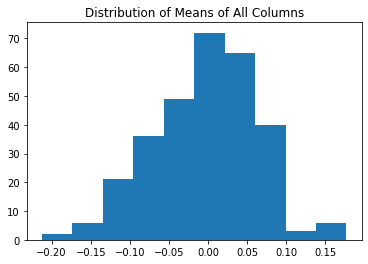

In [6]:
plt.hist(df_train[df_train.columns[2:]].mean(), bins=10)
plt.title('Distribution of Means of All Columns')
plt.show()

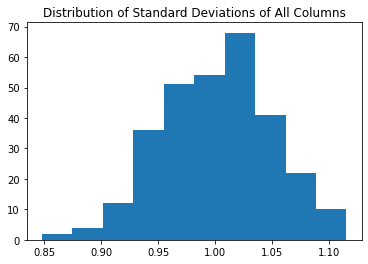

In [7]:
plt.hist(df_train[df_train.columns[2:]].std(), bins=10)
plt.title('Distribution of Standard Deviations of All Columns')
plt.show()

In [8]:
df_train.isnull().sum()

id        0
target    0
0         0
1         0
2         0
         ..
295       0
296       0
297       0
298       0
299       0
Length: 302, dtype: int64

In [9]:
print(df_train.isnull().any().any())
print(df_test.isnull().any().any())

False
False


<Figure size 720x720 with 0 Axes>

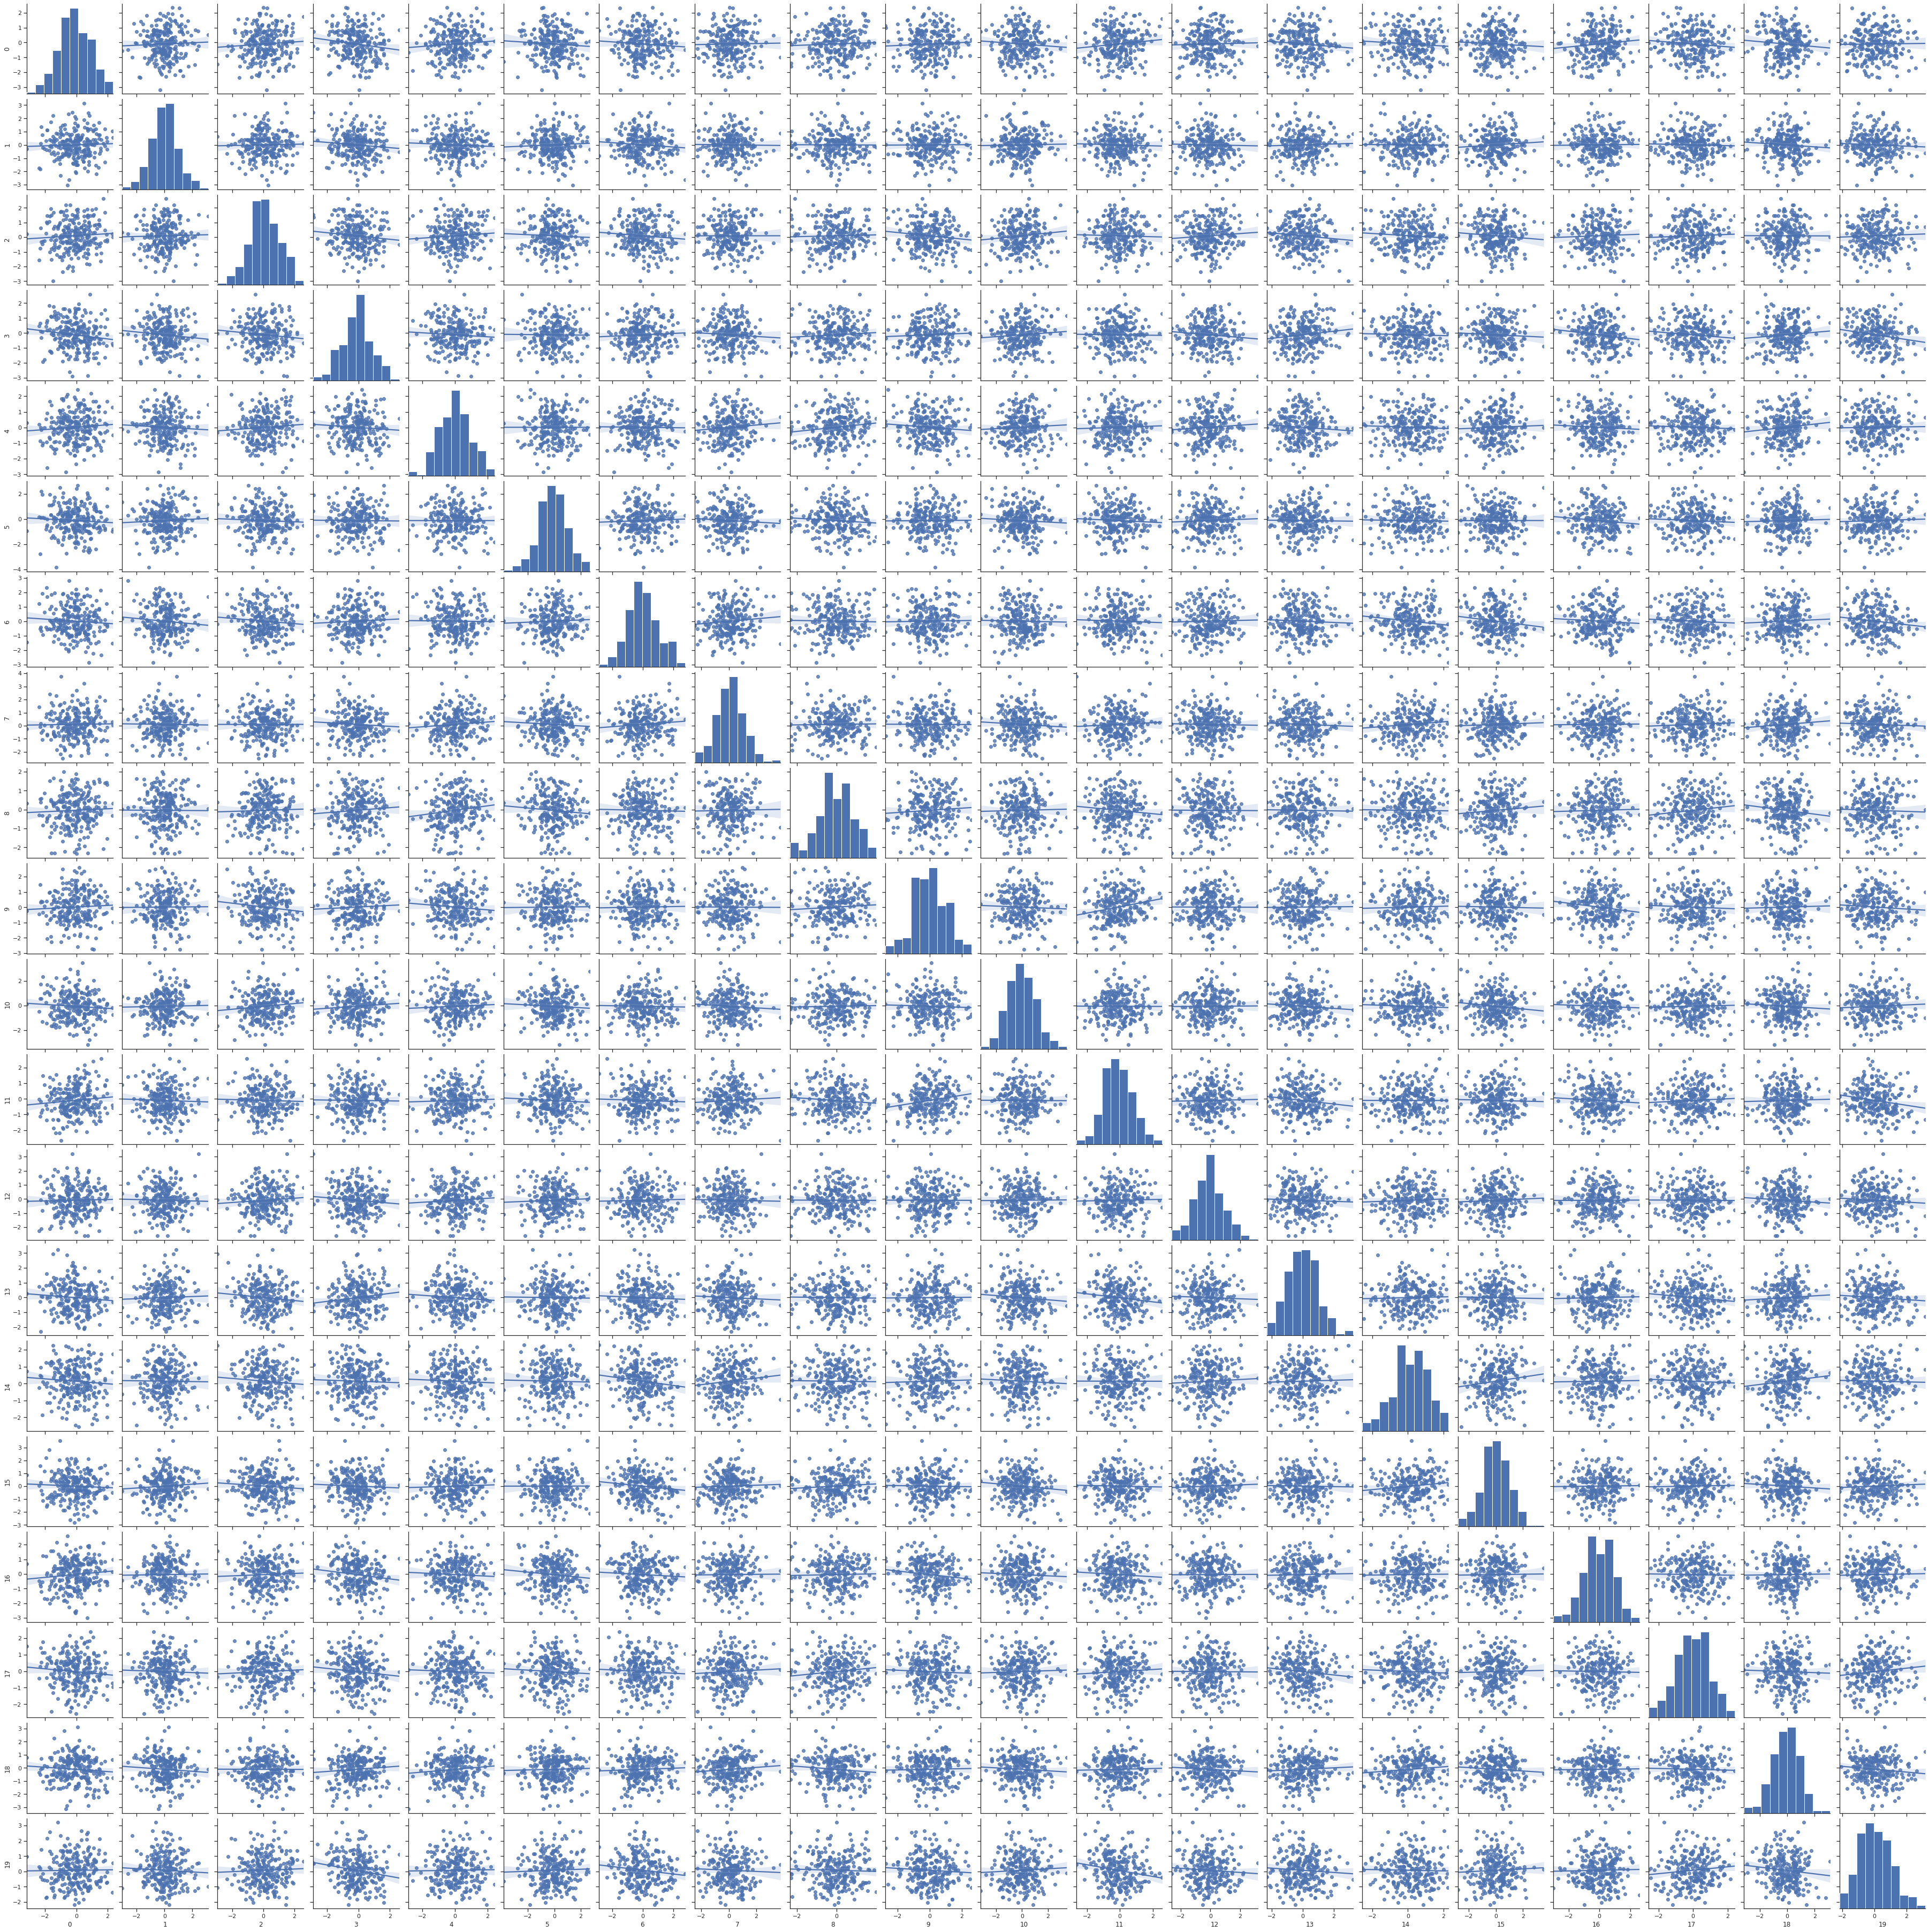

CPU times: user 2min 35s, sys: 580 ms, total: 2min 36s
Wall time: 2min 35s


In [10]:
# Make a paiwise scatter plot.
%%time
plt.figure(figsize=(10, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_train.iloc[:,2:22], kind="reg") # first 20 columns
plt.show()

In [11]:
# Display correlation matrix.
cor = df_train.iloc[:,2:22].corr() # first 20 columns
cor

0         1         2  ...        17        18        19
0   1.000000  0.039939  0.069846  ... -0.090942 -0.082987  0.012760
1   0.039939  1.000000  0.023237  ... -0.029805 -0.072914 -0.051788
2   0.069846  0.023237  1.000000  ...  0.045509 -0.002691  0.041676
3  -0.139829 -0.096873 -0.107534  ... -0.099521  0.083178 -0.174383
4   0.079360 -0.052313  0.077051  ... -0.038056  0.102362  0.015428
5  -0.063259  0.048742 -0.044687  ... -0.052324  0.027317  0.035338
6  -0.071990 -0.086880 -0.086411  ... -0.051279  0.043188 -0.123927
7   0.016923 -0.013418  0.000560  ...  0.049492  0.080567 -0.041408
8   0.043081 -0.005268  0.028217  ...  0.109650 -0.105755 -0.032352
9   0.051027  0.007490 -0.115959  ... -0.043037  0.024078 -0.063785
10 -0.071284  0.020150  0.102101  ...  0.029477 -0.062405  0.052199
11  0.102536 -0.031726 -0.027955  ...  0.056570  0.026092 -0.173944
12  0.024741 -0.023792  0.074115  ... -0.007015 -0.061346 -0.067395
13 -0.085392  0.034874 -0.100684  ... -0.103479  0.056586 -0.070087
14 -0.072575 -0.011118 -0.074979  ... -0.044342  0.102339 -0.021452
15 -0.052386  0.069431 -0.078072  ...  0.022199 -0.066702  0.048335
16  0.101609  0.013117  0.040187  ... -0.018436  0.013268  0.021001
17 -0.090942 -0.029805  0.045509  ...  1.000000 -0.031079  0.109803
18 -0.082987 -0.072914 -0.002691  ... -0.031079  1.000000 -0.110173
19  0.012760 -0.051788  0.041676  ...  0.109803 -0.110173  1.000000

[20 rows x 20 columns]

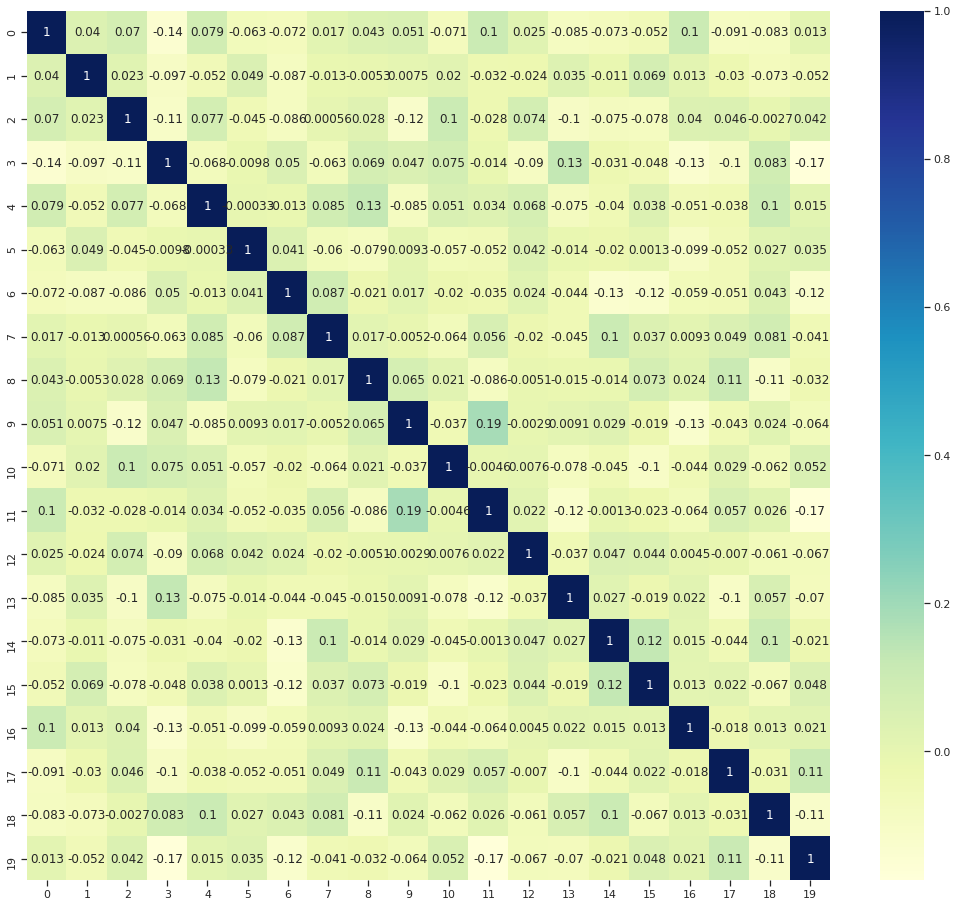

In [12]:
# Plot correlations on a heatmap.
plt.figure(figsize=(18,16))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [13]:
print(df_train['target'].unique())

[1. 0.]


In [14]:
df_train['target'].value_counts()

0.0    183
1.0     67
Name: target, dtype: int64

Text(0.5, 1.0, 'Target Distributions\n')

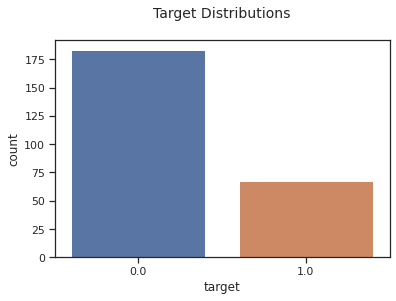

In [15]:
# Display the class distritution.
sns.countplot(x='target', data=df_train)
plt.title('Target Distributions\n', fontsize=14)

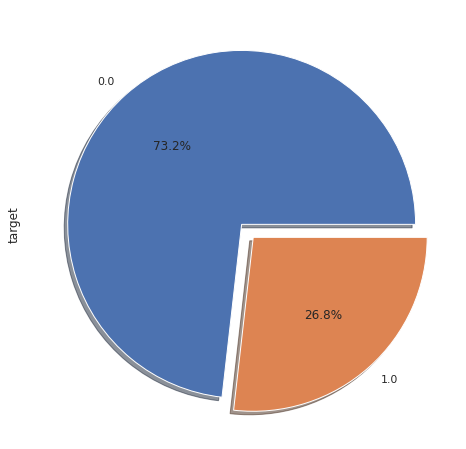

In [16]:
plt.figure(figsize=[8,8])
df_train['target'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.show()

In [17]:
corrs = df_train.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs = corrs[corrs['level_0'] != corrs['level_1']]

In [18]:
corrs.head(10)

level_0 level_1         0
0      id      86  0.000002
1      86      id  0.000002
2     285     123  0.000002
3     123     285  0.000002
4     261     119  0.000002
5     119     261  0.000002
6      64      92  0.000006
7      92      64  0.000006
8      25     224  0.000013
9     224      25  0.000013

In [19]:
corrs.tail(10)

level_0 level_1         0
90892     219     279  0.238512
90893     279     219  0.238512
90894      23      20  0.246984
90895      20      23  0.246984
90896     146     228  0.258447
90897     228     146  0.258447
90898       6      39  0.267727
90899      39       6  0.267727
90900     127  target  0.337540
90901  target     127  0.337540

In [20]:
X_train = df_train.drop(['id', 'target'], axis=1)
y_train = df_train['target']
X_test = df_test.drop(['id'], axis=1)
print(X_train.shape, y_train.shape, X_test.shape)

(250, 300) (250,) (19750, 300)


In [21]:
from sklearn.model_selection import cross_val_score

def crossvalscore(model):
    n_fold = 10
    scores = cross_val_score(model, X_train, y_train, cv=n_fold, scoring='roc_auc', n_jobs=-1)
    acc = cross_val_score(model, X_train, y_train, cv=n_fold, scoring='accuracy', n_jobs=-1)
    rand_scores = pd.DataFrame({
    'cv': range(1,n_fold+1),
    'roc_auc score': scores,
    'accuracy score': acc
    })
    print('AUC:', rand_scores['roc_auc score'].mean())
    print('Accuracy:', rand_scores['accuracy score'].mean())
    return rand_scores.sort_values(by='roc_auc score', ascending=False)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(max_depth=2, random_state=7)
crossvalscore(rand_clf)

AUC: 0.6638262322472848
Accuracy: 0.7319999999999999


cv  roc_auc score  accuracy score
2   3       0.753968            0.72
0   1       0.730159            0.72
6   7       0.730159            0.72
7   8       0.710526            0.76
9  10       0.701754            0.76
3   4       0.658730            0.72
1   2       0.642857            0.72
4   5       0.642857            0.72
5   6       0.611111            0.72
8   9       0.456140            0.76

In [23]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
#pca = PCA(n_components=42)
#X_train = pca.fit_transform(X_train)

In [24]:
log_clf = LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver='liblinear', random_state=7)
crossvalscore(log_clf)

AUC: 0.8067251461988304
Accuracy: 0.7159999999999999


cv  roc_auc score  accuracy score
5   6       0.912698            0.76
0   1       0.896825            0.72
3   4       0.857143            0.72
1   2       0.849206            0.76
6   7       0.841270            0.84
4   5       0.833333            0.76
7   8       0.798246            0.68
2   3       0.753968            0.68
9  10       0.666667            0.56
8   9       0.657895            0.68

In [25]:
from sklearn.feature_selection import RFE

log_clf = LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver='liblinear', random_state=7)
rfe_log_clf = RFE(log_clf, 25)
rfe_log_clf.fit(X_train, y_train)
crossvalscore(rfe_log_clf)

AUC: 0.8076023391812865
Accuracy: 0.7239999999999999


cv  roc_auc score  accuracy score
5   6       0.920635            0.72
0   1       0.896825            0.76
1   2       0.849206            0.80
3   4       0.849206            0.76
6   7       0.841270            0.84
4   5       0.833333            0.76
7   8       0.771930            0.64
2   3       0.753968            0.68
8   9       0.692982            0.68
9  10       0.666667            0.60

In [26]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear', random_state=7)
log_selector = RFE(log_clf, 50)
rand_clf = RandomForestClassifier(max_depth=2, random_state=7)
svm_clf = SVC(gamma='auto',probability=True, random_state=7)
extra_clf = ExtraTreesClassifier(max_depth=2, random_state=7)
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm='SAMME.R', learning_rate=0.5, random_state=7)

voting_clf = VotingClassifier(
    estimators = [('lr',log_selector), ('rf',rand_clf), ('ex',extra_clf), ('sv',svm_clf)],
    voting='soft')

In [27]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              RFE(estimator=LogisticRegression(C=0.1,
                                                               class_weight='balanced',
                                                               dual=False,
                                                               fit_intercept=True,
                                                               intercept_scaling=1,
                                                               l1_ratio=None,
                                                               max_iter=100,
                                                               multi_class='auto',
                                                               n_jobs=None,
                                                               penalty='l1',
                                                               random_state=7,
                                                               solver='liblinear',
           

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

top_features = 20
forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
forest.fit(X_train, y_train)
crossvalscore(forest)

AUC: 0.6515455304928989
Accuracy: 0.7319999999999999


cv  roc_auc score  accuracy score
1   2       0.880952            0.72
6   7       0.785714            0.72
2   3       0.722222            0.72
3   4       0.714286            0.72
7   8       0.710526            0.76
9  10       0.622807            0.76
5   6       0.587302            0.72
0   1       0.555556            0.72
4   5       0.523810            0.72
8   9       0.412281            0.76

In [29]:
importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:top_features]

print('Top features:')
for f in range(top_features):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 127 (0.031539)
2. feature 176 (0.016554)
3. feature 241 (0.012582)
4. feature 133 (0.012242)
5. feature 135 (0.011263)
6. feature 126 (0.011100)
7. feature 59 (0.010686)
8. feature 16 (0.010294)
9. feature 220 (0.009949)
10. feature 199 (0.009758)
11. feature 74 (0.009215)
12. feature 169 (0.008473)
13. feature 66 (0.008463)
14. feature 93 (0.007872)
15. feature 18 (0.007814)
16. feature 107 (0.007373)
17. feature 159 (0.007186)
18. feature 200 (0.007019)
19. feature 243 (0.006849)
20. feature 231 (0.006619)


In [30]:
indices

array([127, 176, 241, 133, 135, 126,  59,  16, 220, 199,  74, 169,  66,
        93,  18, 107, 159, 200, 243, 231])

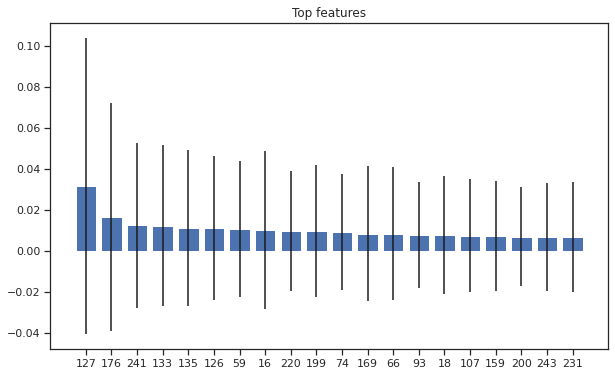

In [31]:
plt.figure(figsize=(10,6))
plt.title('Top features')
plt.bar(
    range(top_features), 
    importances[indices],
    yerr=std[indices], 
)
plt.xticks(range(top_features), indices)
plt.show()

In [32]:
crossvalscore(forest)

AUC: 0.6515455304928989
Accuracy: 0.7319999999999999


cv  roc_auc score  accuracy score
1   2       0.880952            0.72
6   7       0.785714            0.72
2   3       0.722222            0.72
3   4       0.714286            0.72
7   8       0.710526            0.76
9  10       0.622807            0.76
5   6       0.587302            0.72
0   1       0.555556            0.72
4   5       0.523810            0.72
8   9       0.412281            0.76

In [33]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    max_depth=2,
    gamma=2,
    eta=0.8,
    reg_alpha=0.5,
    reg_lambda=0.5
)

xgb_clf.fit(X_train, y_train)
crossvalscore(xgb_clf)

AUC: 0.7052213868003341
Accuracy: 0.7359999999999999


cv  roc_auc score  accuracy score
1   2       0.928571            0.72
0   1       0.801587            0.76
3   4       0.801587            0.80
4   5       0.746032            0.72
7   8       0.745614            0.76
6   7       0.706349            0.80
2   3       0.642857            0.72
5   6       0.626984            0.68
9  10       0.587719            0.76
8   9       0.464912            0.64

In [34]:
cat_params = {'learning_rate': 0.02,
              'depth': 5,
              'l2_leaf_reg': 10,
              'bootstrap_type': 'Bernoulli',
              #'metric_period': 500,
              'od_type': 'Iter',
              'od_wait': 50,
              'random_seed': 7,
              'allow_writing_files': False}

In [35]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(iterations=5000, eval_metric='AUC', **cat_params)
cat_clf.fit(X_train, y_train, verbose=False)
crossvalscore(cat_clf)

AUC: 0.7088137009189641
Accuracy: 0.7319999999999999


cv  roc_auc score  accuracy score
7   8       0.807018            0.76
0   1       0.793651            0.72
3   4       0.793651            0.72
1   2       0.761905            0.72
5   6       0.761905            0.72
6   7       0.690476            0.72
2   3       0.682540            0.72
9  10       0.631579            0.76
4   5       0.595238            0.72
8   9       0.570175            0.76

Need to improve the model.